$\newcommand{\opdiv}{\operatorname{div}}$
$\newcommand{\opcurl}{\operatorname{curl}}$



# Mass Conserving Mixed Stress Method (MCS)

P. Lederer Phd thesis,  J. Gopalakrishnan+P. Lederer+JS '20, '20

A mixed method for the viscosity term using velocity in $H(\opdiv)$.

Consider the vectorial Poisson equation:

Find $u \in [H_{0,D}^1(\Omega)]^d$ such that:

$$
\int_\Omega \nu \nabla u : \nabla v = \int_\Omega f v \qquad \forall \, v
$$

Introduce stress as independent matrix-valued variable

$$
\sigma := \nu \nabla u
$$

to obtain the primal mixed method: find $(\sigma, u)$ such that

$$
\begin{array}{ccccll}
\int \nu^{-1} \sigma : \tau & - & \int \tau : \nabla u & = & 0 & \forall \, \tau  \\
-\int \sigma : \nabla v & & & = & -\int f v & \forall \, v.
\end{array}
$$

Is a well posed formulation on $\Sigma \times V = [L_2]^{d\times d} \times [H^1]^d$.

Integration by parts moves the derivatives to the stress:

$$
\begin{array}{ccccll}
\int \nu^{-1} \sigma : \tau & + & \int \opdiv \tau \cdot u & = & 0 & \forall \, \tau  \\
\int \opdiv \sigma \cdot v & & & = & -\int f v & \forall \, v.
\end{array}
$$

Well posed formulation on $\Sigma \times V = [H(\opdiv)]^d \times [L_2]^d$

## MCS - pairing

Primal mixed method for $[L_2]^{d\times d} \times [H^1]^d$

$$
\left< \opdiv \sigma, v \right> = - \int \sigma : \nabla v
$$

Dual mixed method for $[H(\opdiv)]^d \times [L_2]^d$

$$
\left< \opdiv \sigma, v \right> = \int \opdiv \sigma \; v
$$


Find $\Sigma$-norm such that 

$$
\left< \opdiv \sigma, v \right>
$$

is well-posed for $v \in H(\opdiv)$.

\begin{eqnarray*}
H(\opcurl \opdiv) & = & \{ \sigma \in L_2^{d \times d}, \operatorname{tr} \sigma = 0 : \opdiv \sigma \in H(\opdiv)^\ast \} \\
& = & \{ \sigma \in L_2^{d \times d}, \operatorname{tr} \sigma = 0  : \opcurl \opdiv \sigma \in H^{-1} \} 
\end{eqnarray*}

with norm

$$
\| \sigma \|_{H(cd)}^2 = \| \sigma \|_{L_2}^2 + \| \opcurl \opdiv \sigma \|_{H^{-1}}^2
$$

**Lemma:** well-posedness of div-pairing

$$
\forall \, \sigma \, \forall \, u: \quad \left< \opdiv \sigma, u \right> \le c \, \| \sigma \|_{H(cd)} \| u \|_{H(\opdiv)}
$$
$$
\forall \, u  \, \exists \, \sigma: \quad \left< \opdiv \sigma, u \right> \ge \beta \, \| \sigma \|_{H(cd)} \| u \|_{H(\opdiv)}
$$

**Corollary:** well-posedness of Stokes

Find $\sigma \in H(cd), u \in H(\opdiv), p \in L_2$:

$$
\begin{array}{ccccll}
\int \nu^{-1} \sigma \tau & + & \left< \opdiv \tau, u \right> + (\opdiv u, q) & = & 0 & \forall \, \tau, q \\
\left< \opdiv \sigma, v \right> + (\opdiv v, p) & & & = & f(v) & \forall \, v
\end{array}
$$

## Finite elements for H(cd)

Consider piece-wise smooth $\sigma$ witch are $nt$-continuous across interfaces. The distributional divergence is (with smooth compactly supported test-functions $\varphi$):

\begin{eqnarray*}
\left< \operatorname{div} \sigma, \varphi \right> & := & - \int_\Omega \sigma : \nabla \varphi \\
& = & -\sum_T \int_T \sigma : \nabla \varphi \\
& = & \sum_T \int_T \operatorname{div} \sigma \, \varphi - \int_{\partial T} \sigma_n \varphi  \\
& = & \sum_T \int_T \operatorname{div} \sigma \, \varphi + \sum_E \int_E \underbrace{ [\sigma_n] }_{= [\sigma_{nn}]} \varphi \\
& = & \sum_T \int_T \operatorname{div} \sigma \, \varphi + \sum_E \int_E  [\sigma_{nn}] \varphi_n
\end{eqnarray*}

The distributional divergence is well-defined for test-functions $\varphi$ with single-valued normal trace $\varphi_n$.

Finite element pairings:
* $\Sigma_h = \{ \sigma \in [P_k]^{d \times d}, tr \sigma = 0, [\sigma_{nt}] = 0 \}$
* $V_h = {\mathcal BDM}_k = \{ v \in [P_k]^{d}, [v_{n}] = 0 \}$
* $Q_h = P_{k-1}$


**Theorem:** The finite element system is well posed. 

Simple finite element shape functions for $\Sigma_h$ for all $k \geq 0$ are defined for the reference element, and mapped to the physical element via Piola from the left side, and covariant transformation from the right side:

$$
\sigma (\Phi(x)) = \frac{1}{J} F \hat \sigma(x) F^{-1}
$$

## Weakly symmetric formulation

To deal with the physically correct viscosity term

$$
\int \nu \varepsilon(u) : \varepsilon(v),
$$

and symmetric stress tensor $\sigma = \nu \varepsilon(u)$, we need an additional Lagrange parameter for enforcing symmetry. To satisfy the additional equations, one has to enrich $\Sigma$. We proposed and analyzed to enrich by bubble functions

$$
\operatorname{curl} \gamma, 
$$

where $\gamma$ are symmetric matrix-valued bubble functions.



**Comment:** MCS is similar as the TDNNS method for elasticity, where displacements are $t$-continuous, and stresses are $nn$-continuous. The have now all types of $nn$, $nt$, and $tt$ continuous finite element spaces. They fit in a 2-complex, similar to the de Rham complex.

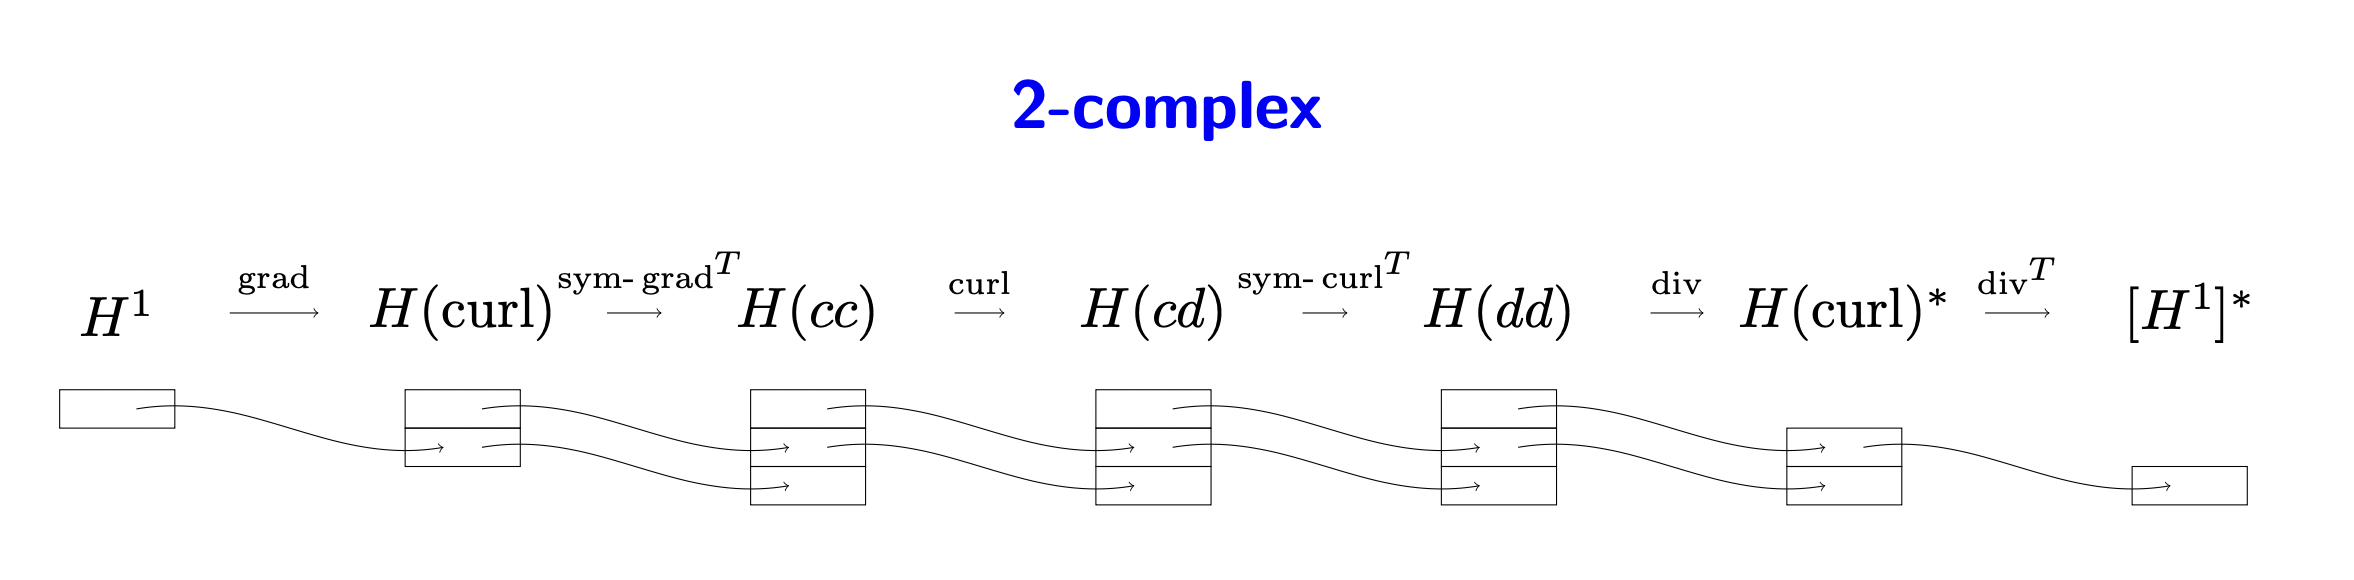


In [ ]:
from ngsolve import *
from ngsolve.webgui import Draw

from netgen.occ import *
from netgen.webgui import Draw as DrawGeo
shape = Rectangle(2,0.41).Circle(0.2,0.2,0.05).Reverse().Face()
shape.edges.name="wall"
shape.edges.Min(X).name="inlet"
shape.edges.Max(X).name="outlet"
mesh = Mesh(OCCGeometry(shape, dim=2).GenerateMesh(maxh=0.07)).Curve(3)
Draw (mesh);

In [ ]:
order=2
nu = 0.001

V = HDiv(mesh, order=order, dirichlet="wall|inlet")
Sigma = HCurlDiv(mesh, order=order, orderinner=order, dirichlet="outlet")
Q = L2(mesh, order=order-1)

X = Sigma*V*Q
sigma,u,p = X.TrialFunction()
tau,v,q = X.TestFunction()

dS = dx(element_boundary=True)
n = specialcf.normal(mesh.dim)
def tang(u): return u-(u*n)*n

stokes = -0.5/nu * InnerProduct(sigma,tau) * dx + \
          (div(sigma)*v+div(tau)*u) * dx + \
          -((sigma*n*n) * (v*n) + (tau*n*n )* (u*n)) * dS + \
            div(u)*q*dx + div(v)*p*dx - 0*p*q*dx

a = BilinearForm(stokes).Assemble()
f = LinearForm(X).Assemble()

In [ ]:
gf = GridFunction(X)

gfsigma, gfu, gfp = gf.components

uin = CF( (1.5*4*y*(0.41-y)/(0.41*0.41), 0) )
gfu.Set(uin, definedon=mesh.Boundaries("inlet"))

inv_stokes = a.mat.Inverse(X.FreeDofs())

res = f.vec - a.mat*gf.vec
gf.vec.data += inv_stokes * res

Draw (gfu, mesh)
Draw (gfp, mesh);

## Hybridization

We can perform hybridization similar to mixed methods:
The nt-continuity of $\sigma \in H(cd)$ is not introduced to the space, but enforced by another Lagrange parameter in the tangential space on the edges. It has the meaning of the tangential velocity.
The discontinuous stresses $\sigma$ can be condensed out in the assemly loop.

Thus, the $A$-block of the Stokes system is positive definite.

In [ ]:
order=2
nu = 1

Sigma = Discontinuous(HCurlDiv(mesh, order=order-1, orderinner=order))
V = HDiv(mesh, order=order, dirichlet="wall|inlet")
Vhat = TangentialFacetFESpace(mesh, order=order-1, dirichlet="wall|inlet")
Q = L2(mesh, order=order-1)

X = Sigma*V*Vhat*Q
sigma,u,uhat,p = X.TrialFunction()
tau,v,vhat,q = X.TestFunction()

dS = dx(element_boundary=True)
n = specialcf.normal(mesh.dim)
def tang(u): return u-(u*n)*n

stokes = -0.5/nu * InnerProduct(sigma,tau) * dx + \
          (div(sigma)*v+div(tau)*u) * dx + \
          -(((sigma*n)*n) * (v*n) + ((tau*n)*n )* (u*n)) * dS + \
          (-(sigma*n)*tang(vhat) - (tau*n)*tang(uhat)) * dS + \
            div(u)*q*dx + div(v)*p*dx - 0*p*q*dx

a = BilinearForm(stokes).Assemble()
f = LinearForm(X).Assemble()

In [ ]:
gf = GridFunction(X)

gfsigma, gfu, gfuhat, gfp = gf.components

uin = CF( (1.5*4*y*(0.41-y)/(0.41*0.41), 0) )
gfu.Set(uin, definedon=mesh.Boundaries("inlet"))

inv_stokes = a.mat.Inverse(X.FreeDofs())

res = f.vec.CreateVector()
res.data = f.vec - a.mat*gf.vec
gf.vec.data += inv_stokes * res

Draw (gfu, mesh)
Draw (gfp, mesh);